<a href="https://colab.research.google.com/github/The19146267/AI/blob/main/Tien_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Money'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Money'

In [4]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 110 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [5]:
train_dataset.class_indices

{'0.2k': 0,
 '0.5k': 1,
 '100k': 2,
 '10k': 3,
 '1k': 4,
 '200k': 5,
 '20k': 6,
 '2k': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(11,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
11/11 [==============================] - 43s 4s/step - loss: 2.6020 - accuracy: 0.0909 - val_loss: 2.4387 - val_accuracy: 0.0818
Epoch 2/50
11/11 [==============================] - 2s 221ms/step - loss: 2.5620 - accuracy: 0.0273 - val_loss: 2.3908 - val_accuracy: 0.1091
Epoch 3/50
11/11 [==============================] - 2s 221ms/step - loss: 2.4182 - accuracy: 0.0818 - val_loss: 2.3852 - val_accuracy: 0.1182
Epoch 4/50
11/11 [==============================] - 2s 214ms/step - loss: 2.3958 - accuracy: 0.0909 - val_loss: 2.3815 - val_accuracy: 0.1364
Epoch 5/50
11/11 [==============================] - 2s 216ms/step - loss: 2.3917 - accuracy: 0.1091 - val_loss: 2.3873 - val_accuracy: 0.1545
Epoch 6/50
11/11 [==============================] - 2s 218ms/step - loss: 2.3888 - accuracy: 0.1091 - val_loss: 2.3755 - val_accuracy: 0.1182
Epoch 7/50
11/11 [==============================] - 2s 223ms/step - loss: 2.3775 - accuracy: 0.1273 - val_loss: 2.3640 - val_accuracy: 0.1636
Epoch 8/

In [14]:
model.save('/content/drive/MyDrive/Money.h5')

In [15]:
classificationFood_model = load_model('/content/drive/MyDrive/Money.h5')

In [16]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

11/11 [==============================] - 1s 80ms/step - loss: 0.2125 - accuracy: 0.9273
Test loss =  0.21245290338993073
Test accuracy =  0.9272727370262146


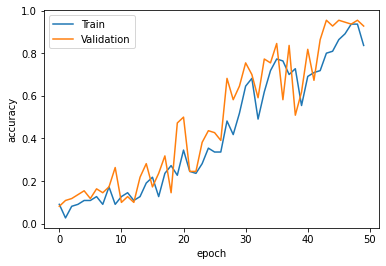

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  100k


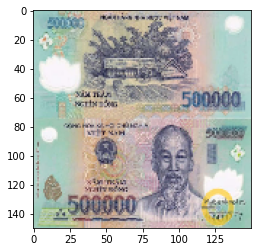

In [19]:
img = load_img('/content/drive/MyDrive/Money/PredictMoney/500k10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k',
 '0.5k',
 '1k',
 '2k',
 '5k',
 '10k',
 '20k',
 '50k',
 '100k',
 '200k',
 '500k']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  10k


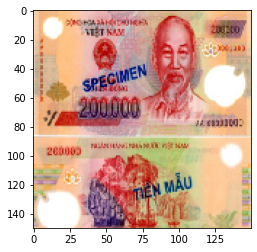

In [20]:
img = load_img('/content/drive/MyDrive/Money/PredictMoney/200k10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k',
 '0.5k',
 '1k',
 '2k',
 '5k',
 '10k',
 '20k',
 '50k',
 '100k',
 '200k',
 '500k']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  0.2k


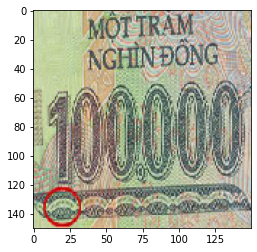

In [21]:
img = load_img('/content/drive/MyDrive/Money/PredictMoney/100k10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k',
 '0.5k',
 '1k',
 '2k',
 '5k',
 '10k',
 '20k',
 '50k',
 '100k',
 '200k',
 '500k']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  200k


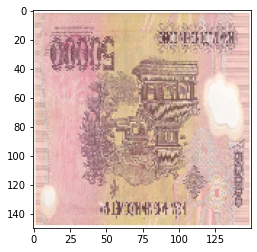

In [22]:
img = load_img('/content/drive/MyDrive/Money/PredictMoney/50k10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k',
 '0.5k',
 '1k',
 '2k',
 '5k',
 '10k',
 '20k',
 '50k',
 '100k',
 '200k',
 '500k']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  20k


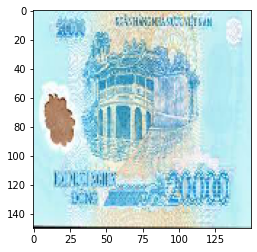

In [23]:
img = load_img('/content/drive/MyDrive/Money/PredictMoney/20k10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k',
 '0.5k',
 '1k',
 '2k',
 '5k',
 '10k',
 '20k',
 '50k',
 '100k',
 '200k',
 '500k']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])